In [88]:
import os

import numpy as np
import pandas as pd
import shutil
import csv
import cv2
import time
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

In [23]:
annotaion_path = '../../data/data/annotation.csv'
df = pd.read_csv(annotaion_path)

df = df[:1]
idx = 0

landmarks = df.loc[idx, 'x1':].tolist()

img_title = df.image_name[0]
print(img_title)
img_path = '../../data/data/images/' + img_title
print(img_path)

img = cv2.imread(img_path, 0)
print(img.shape)
img_y, img_x = img.shape

landmarks_x = landmarks[0::2]
landmarks_y = landmarks[1::2]
# print(len(landmarks_x), len(landmarks_y))

print("--- x ---")
x_min, x_max = min(landmarks_x), max(landmarks_x)
print(x_min, x_max)

print("--- y ---")
y_min, y_max = min(landmarks_y), max(landmarks_y)
print(y_min, y_max)


kx1 = (x_min - 0) // 2
kx2 = (img_x - x_max) // 2

ky1 = (y_min - 0) // 2
ky2 = (img_y - y_max) // 2

5a001349e4b0dca30d30524e.jpg
../../data/data/images/5a001349e4b0dca30d30524e.jpg
(3015, 3015)
--- x ---
559 2689
--- y ---
308 1865


(2440, 2852)


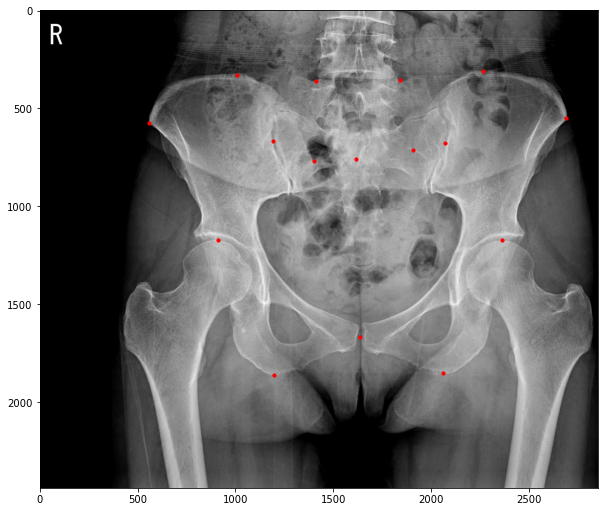

In [47]:
# crop 1
cropped_img = img[:y_max + ky2, :x_max + kx2]
print(cropped_img.shape)

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.show()

(2440, 2736)


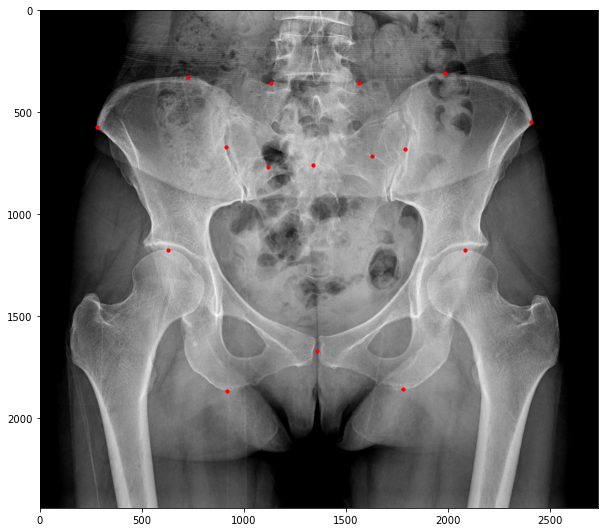

In [52]:
# crop 2
img = cv2.imread(img_path, 0)

cropped_img = img[:y_max+ky2, kx1:]
print(cropped_img.shape)

cropped_landmarks2 = landmarks.copy()
for i in range(0, len(cropped_landmarks2), 2):
    cropped_landmarks2[i] -= kx1 

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
for j in range(0, len(cropped_landmarks2), 2):
    plt.scatter(cropped_landmarks2[j], cropped_landmarks2[j+1], c='r', s=10)
plt.show()

(3015, 3015)
(2861, 2852)


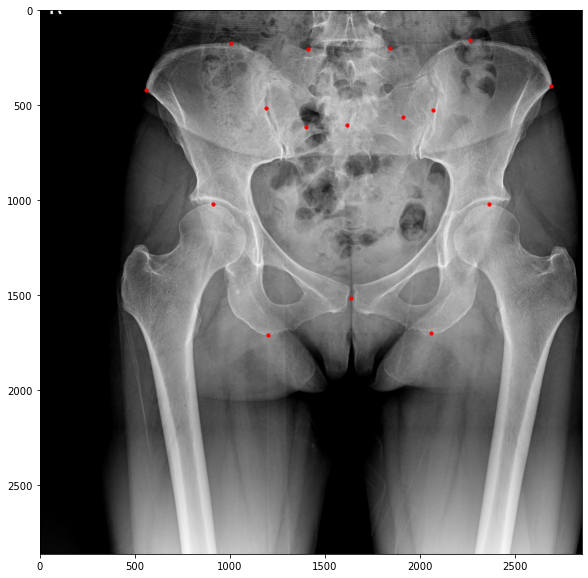

In [63]:
# crop 3
img = cv2.imread(img_path, 0)
print(img.shape)

cropped_img = img[ky1:, :x_max + kx2]
print(cropped_img.shape)

cropped_landmarks3 = landmarks.copy()
for i in range(1, len(cropped_landmarks3), 2):
    cropped_landmarks3[i] -= ky1 

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
for j in range(0, len(cropped_landmarks3), 2):
    plt.scatter(cropped_landmarks3[j], cropped_landmarks3[j+1], c='r', s=10)
plt.show()

(3015, 3015)
(2861, 2736)


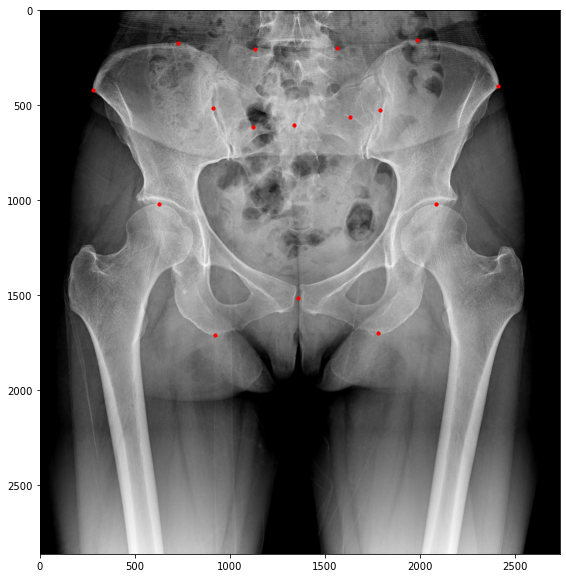

In [66]:
# crop 4
img = cv2.imread(img_path, 0)
print(img.shape)

cropped_img = img[ky1:, kx1:]
print(cropped_img.shape)

cropped_landmarks4 = landmarks.copy()
for i in range(0, len(cropped_landmarks4)):
    if i%2 == 0:
        cropped_landmarks4[i] -= kx1 
    else:
        cropped_landmarks4[i] -= ky1 

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
for j in range(0, len(cropped_landmarks4), 2):
    plt.scatter(cropped_landmarks4[j], cropped_landmarks4[j+1], c='r', s=10)
plt.show()

(3015, 3015)
(2286, 2572)


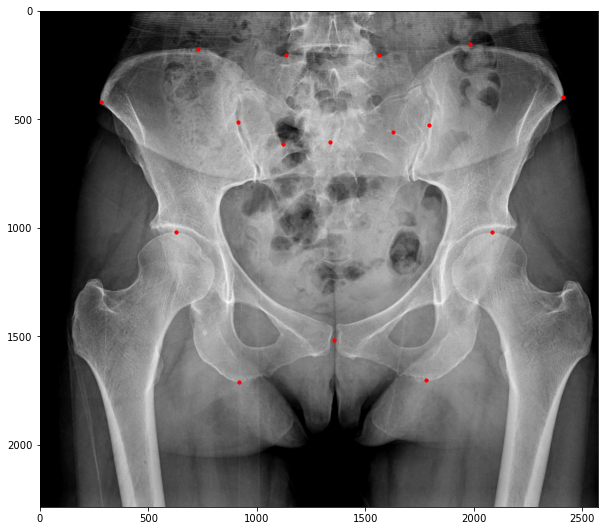

In [69]:
# crop 5
img = cv2.imread(img_path, 0)
print(img.shape)

cropped_img = img[y_min-ky1:y_max+ky2, x_min-kx1:x_max+kx2]
print(cropped_img.shape)

cropped_landmarks5 = landmarks.copy()
for i in range(0, len(cropped_landmarks5)):
    if i%2 == 0:
        cropped_landmarks5[i] -= kx1 
    else:
        cropped_landmarks5[i] -= ky1 

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img, cmap='gray')
for j in range(0, len(cropped_landmarks5), 2):
    plt.scatter(cropped_landmarks5[j], cropped_landmarks5[j+1], c='r', s=10)
plt.show()

In [86]:
def crop_5(img_path, landmarks, path):
    # print(img_path.split('/'))
    title = img_path.split('/')[-1].split('.')[0]

    img = cv2.imread(img_path, 0)
    img_y, img_x = img.shape

    landmarks_x = landmarks[0::2]
    landmarks_y = landmarks[1::2]

    x_min, x_max = min(landmarks_x), max(landmarks_x)
    y_min, y_max = min(landmarks_y), max(landmarks_y)

    kx1 = (x_min - 0) // 2
    kx2 = (img_x - x_max) // 2

    ky1 = (y_min - 0) // 2
    ky2 = (img_y - y_max) // 2

    # org
    cv2.imwrite(f"{path}{title}.jpg", img)

    # 1 crop
    cropped_img1 = img[:y_max + ky2, :x_max + kx2]
    cropped_landmarks1 = landmarks.copy()
    cv2.imwrite(f"{path}{title}_1.jpg", cropped_img1)

    # 2 crop
    cropped_img2 = img[:y_max+ky2, kx1:]
    cropped_landmarks2 = landmarks.copy()
    for i in range(0, len(cropped_landmarks2), 2):
        cropped_landmarks2[i] -= kx1
    cv2.imwrite(f"{path}{title}_2.jpg", cropped_img2)

    # 3 crop
    cropped_img3 = img[ky1:, :x_max + kx2]
    cropped_landmarks3 = landmarks.copy()
    for i in range(1, len(cropped_landmarks3), 2):
        cropped_landmarks3[i] -= ky1 
    cv2.imwrite(f"{path}{title}_3.jpg", cropped_img3)

    # 4 crop
    cropped_img4 = img[ky1:, kx1:]
    cropped_landmarks4 = landmarks.copy()
    for i in range(0, len(cropped_landmarks4)):
        if i%2 == 0:
            cropped_landmarks4[i] -= kx1 
        else:
            cropped_landmarks4[i] -= ky1
    cv2.imwrite(f"{path}{title}_4.jpg", cropped_img4)

    # 5 crop
    cropped_img5 = img[y_min-ky1:y_max+ky2, x_min-kx1:x_max+kx2] 
    cropped_landmarks5 = landmarks.copy()
    for i in range(0, len(cropped_landmarks5)):
        if i%2 == 0:
            cropped_landmarks5[i] -= kx1 
        else:
            cropped_landmarks5[i] -= ky1 
    cv2.imwrite(f"{path}{title}_5.jpg", cropped_img5)

    res = [landmarks, cropped_landmarks1, cropped_landmarks2, cropped_landmarks3, cropped_landmarks4, cropped_landmarks5]
    return res
    

In [89]:
# Make dir
aug_path = './aug/'
if os.path.exists(aug_path):
    shutil.rmtree(aug_path)
os.makedirs(aug_path)


landmarks_lst = crop_5(img_path, landmarks, aug_path)
print(len(landmarks_lst))

6
